# DOMAIN´S CLUSTERING THROUGH KMEANS ALGORITHM

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import pickle
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_samples, silhouette_score


In [18]:
groupby_domains = pd.read_csv('Global groupby_domains.csv')
groupby_domains.drop('Unnamed: 0', 1, inplace = True)

- Dropping the null data (I´ll add the miss values later) and standarizing the data with Standard Scaler

In [19]:
groupby_domains_clustering = groupby_domains.drop(['Domain','Category'], 1)
groupby_domains_clustering.dropna(inplace=True)
groupby_domains_clustering.dropna

groupby_domains_clustering_scaled = StandardScaler().fit_transform(groupby_domains_clustering)

### GRIDSEARCHCV to find the best parameters. 
I did this part in Google Collab in order to save time, saving the model and the results

In [ ]:
kmeans = KMeans()
parameters = {'n_clusters':range(1,15),
              'init' : ('k-means++', 'random'), 
              'n_init':[5,10,15,20],
              'max_iter' : [50,100,200,300,400,500,700,1000],
              'algorithm' : ('auto', 'full', 'elkan')}

kmeans_gridsearchcv = GridSearchCV(estimator = kmeans, param_grid = parameters)

In [ ]:
%%time
kmeans_gridsearchcv.fit(groupby_domains_clustering_scaled)

In [43]:
#Saving the results in a DataFrame
results_gridsearch = pd.DataFrame(kmeans_gridsearchcv.cv_results_).sort_values(by='rank_test_score')
results_gridsearch.to_csv('GridSearch Results.csv')

In [39]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(kmeans_gridsearchcv, open(filename, 'wb'))

In [7]:
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))


In [11]:
loaded_model.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=400,
       n_clusters=14, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
gridsearch_results = pd.read_csv('GridSearch Results.csv')
gridsearch_results.head(10)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,727,0.164706,0.006238,0.000600,0.000490,auto,random,400,14,20,"{'algorithm': 'auto', 'init': 'random', 'max_i...",-2216.368743,-494.103349,-510.062747,-773.348132,-1315.942518,-1061.965098,649.232659,1
1,1509,0.125328,0.009764,0.000400,0.000490,full,random,200,14,10,"{'algorithm': 'full', 'init': 'random', 'max_i...",-2225.807588,-518.674718,-482.201366,-750.431294,-1428.473501,-1081.117694,665.637645,2
2,781,0.079755,0.007955,0.000599,0.000489,auto,random,500,14,10,"{'algorithm': 'auto', 'init': 'random', 'max_i...",-2219.339864,-482.012558,-497.893013,-799.021554,-1416.045499,-1082.862497,661.266564,3
3,780,0.040777,0.003428,0.000200,0.000400,auto,random,500,14,5,"{'algorithm': 'auto', 'init': 'random', 'max_i...",-2217.652003,-502.463171,-513.086866,-818.328595,-1382.710819,-1086.848291,649.470960,4
4,726,0.121730,0.007804,0.000800,0.000400,auto,random,400,14,15,"{'algorithm': 'auto', 'init': 'random', 'max_i...",-2242.224597,-511.899116,-537.562886,-813.710200,-1330.891300,-1087.257620,648.280184,5
5,2460,0.044574,0.007813,0.000400,0.000490,elkan,random,300,14,5,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-2244.453148,-508.299766,-516.534558,-748.685854,-1430.710593,-1089.736784,668.218311,6
6,2518,0.125128,0.014733,0.000400,0.000490,elkan,random,400,14,15,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-2246.768260,-550.885801,-553.388802,-768.211981,-1334.711261,-1090.793221,645.001781,7
7,1399,0.263849,0.015840,0.000000,0.000000,full,random,50,14,20,"{'algorithm': 'full', 'init': 'random', 'max_i...",-2264.793252,-548.038541,-493.151915,-733.900350,-1416.451290,-1091.267069,672.823665,8
8,1676,0.057568,0.005236,0.000600,0.000490,full,random,500,14,5,"{'algorithm': 'full', 'init': 'random', 'max_i...",-2226.279299,-586.979239,-553.827746,-768.021343,-1324.243764,-1091.870278,630.898427,9
9,2517,0.081553,0.005567,0.000400,0.000490,elkan,random,400,14,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-2220.775946,-539.949047,-518.243964,-748.966538,-1432.869952,-1092.161089,654.515933,10


### ELBOW METHOD TO VISUALLY CHECK THE IDEAL NUMBER OF CLUSTERS

In [28]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=3400, n_init=20)
    kmeans.fit(groupby_domains_clustering_scaled)
    wcss.append(kmeans.inertia_)


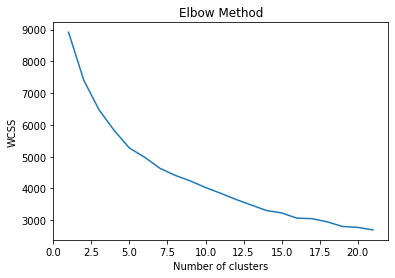

In [29]:
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the KMEANS model with the GridSearch parameters

In [30]:
kmeans = KMeans(n_clusters=14, init='random', max_iter=400, n_init=20)
kmeans.fit(groupby_domains_clustering_scaled)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=400,
       n_clusters=14, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
print(kmeans.cluster_centers_)

[[-6.75458313e-02 -1.63655378e-01 -2.04982361e-01  1.09381059e-01
  -6.15341661e-02  3.83027129e-02 -6.92924439e-02  1.79573433e-01
  -2.40907480e-01 -3.11019869e-01 -3.29152863e-01 -3.26972177e-01
   8.39907100e-01  8.26721576e-01]
 [-5.56675979e-01 -3.68150607e-01 -3.51693046e-01  7.31372711e-01
  -8.05868340e-01  8.90957200e+00 -2.94197388e-01  3.15465895e-01
  -9.49272165e-01 -1.73032481e+00 -2.28078664e+00 -2.68755007e+00
  -1.24327508e+00 -1.09733871e+00]
 [-3.38828799e-01 -3.11535878e-01 -4.34161673e-01 -5.10618311e-01
  -2.27191240e-01 -8.85489066e-02 -2.52805796e-01 -7.27026259e-02
  -1.47363109e+00 -1.66093332e+00 -1.68211756e+00 -1.65182926e+00
  -7.58707750e-01 -6.39229120e-01]
 [ 2.63367889e+00  1.43579539e+00  2.38435538e-01 -3.43353986e-01
   8.47840524e-02  1.89162941e-03  8.83743792e-01 -2.04306137e-01
   1.25758921e-01  1.73824762e-01  1.86989996e-01  1.89048293e-01
   3.42090943e-01  9.11295655e-01]
 [-5.17027722e-01 -3.47669611e-01 -3.01045192e-01  4.33995312e-01
  

### Plot the clusters

In [47]:
def plot_clustering(data, clusters, centroids = []):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(groupby_domains_clustering_scaled[:,0], groupby_domains_clustering_scaled[:,1],
                c=clusters, cmap="plasma", linewidths=0)

    if centroids != []:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


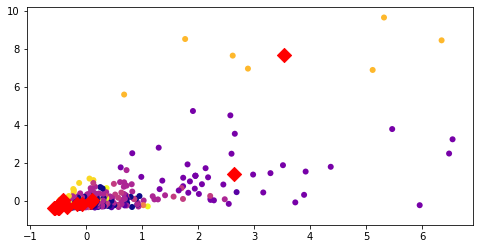

In [52]:
centroids_sk = kmeans.cluster_centers_
clusters_sk = kmeans.predict(groupby_domains_clustering_scaled)
plot_clustering(groupby_domains_clustering_scaled, clusters_sk, centroids_sk)

## SILHOUETTE ANALYSIS

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2 The average silhouette_score is : 0.22444882516302908
For n_clusters = 3 The average silhouette_score is : 0.24502773404388106
For n_clusters = 4 The average silhouette_score is : 0.20967071795088407
For n_clusters = 5 The average silhouette_score is : 0.18094235656560373
For n_clusters = 6 The average silhouette_score is : 0.17370145591304997
For n_clusters = 8 The average silhouette_score is : 0.15747518821328382
For n_clusters = 10 The average silhouette_score is : 0.16062488627687221
For n_clusters = 12 The average silhouette_score is : 0.1439259348499101
For n_clusters = 14 The average silhouette_score is : 0.18089985220218177
For n_clusters = 16 The average silhouette_score is : 0.1638128183548363


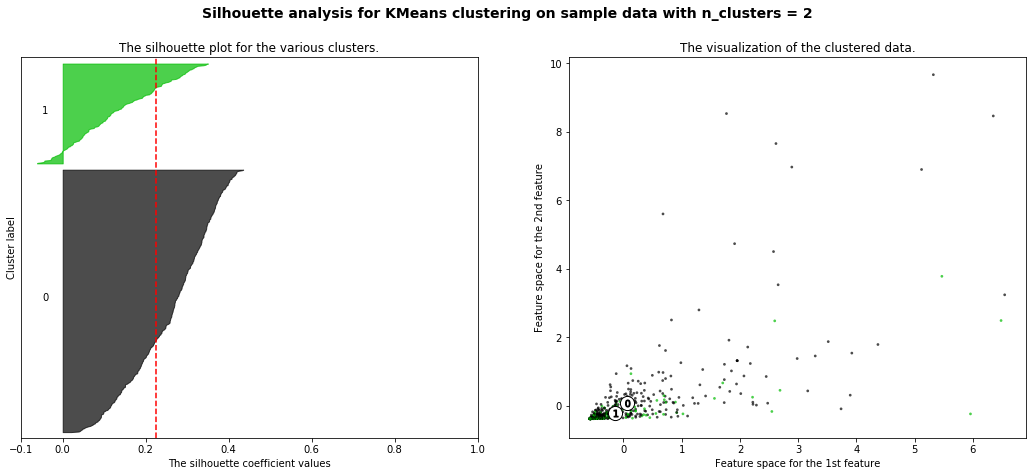

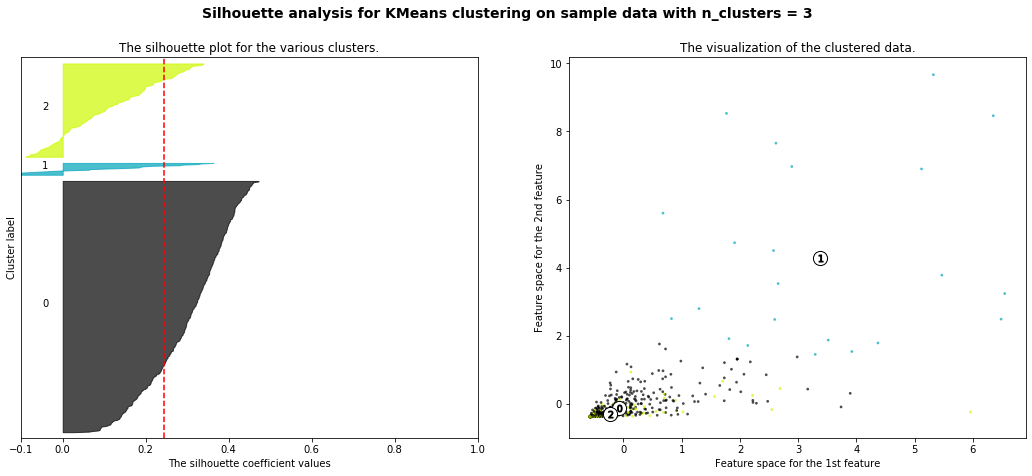

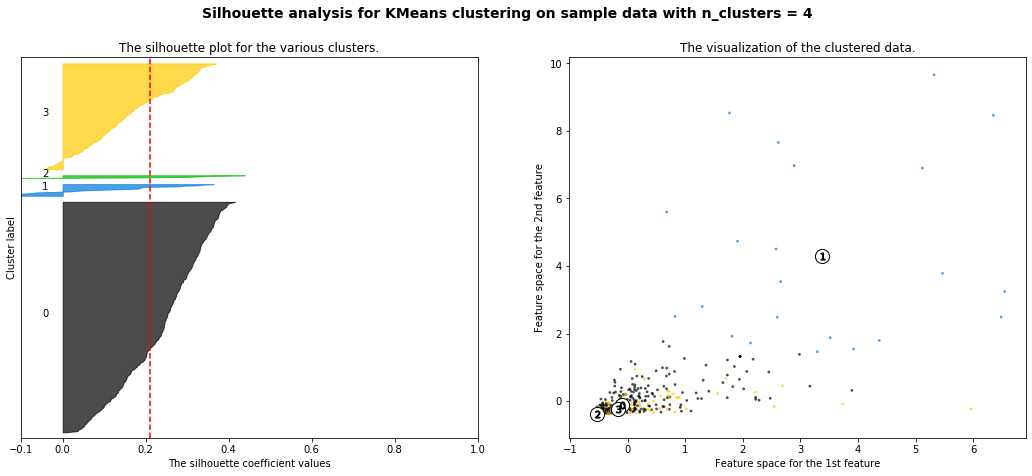

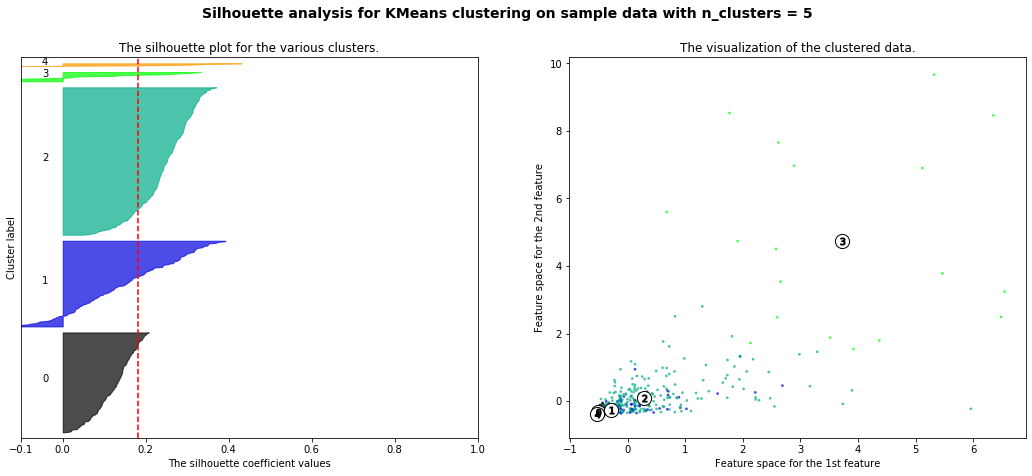

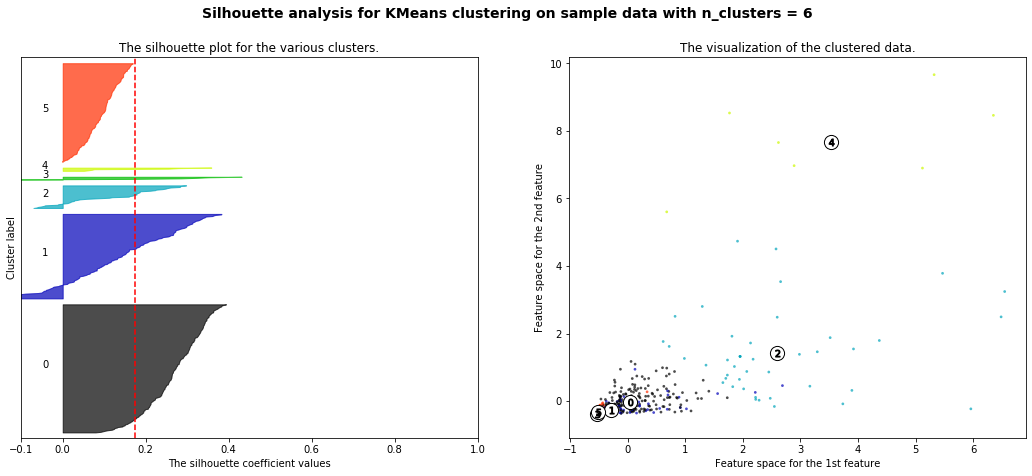

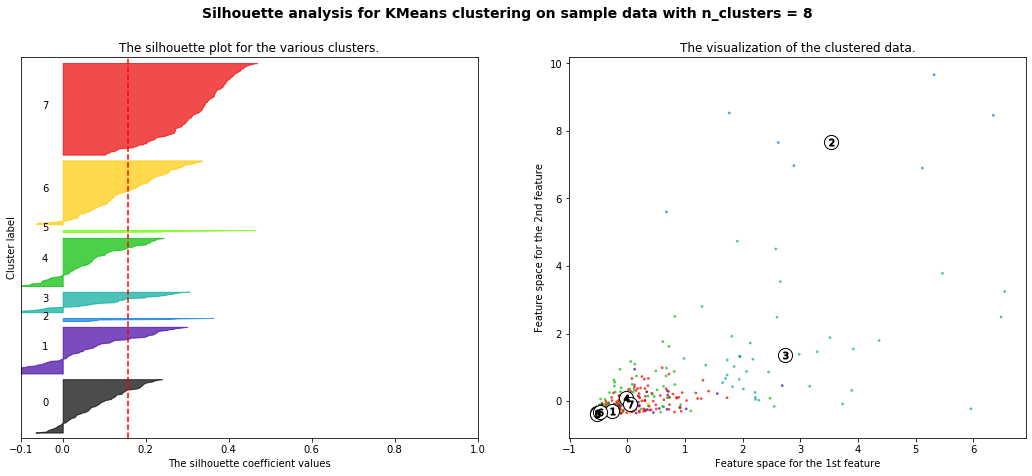

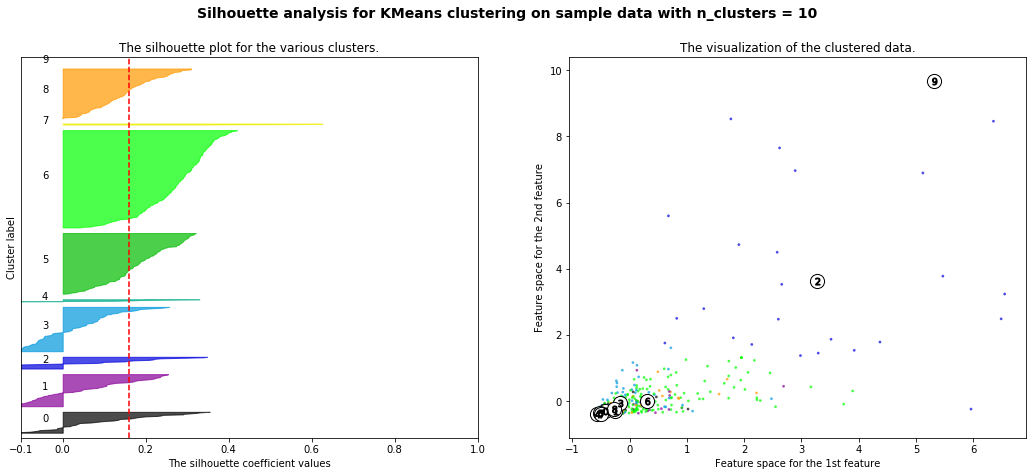

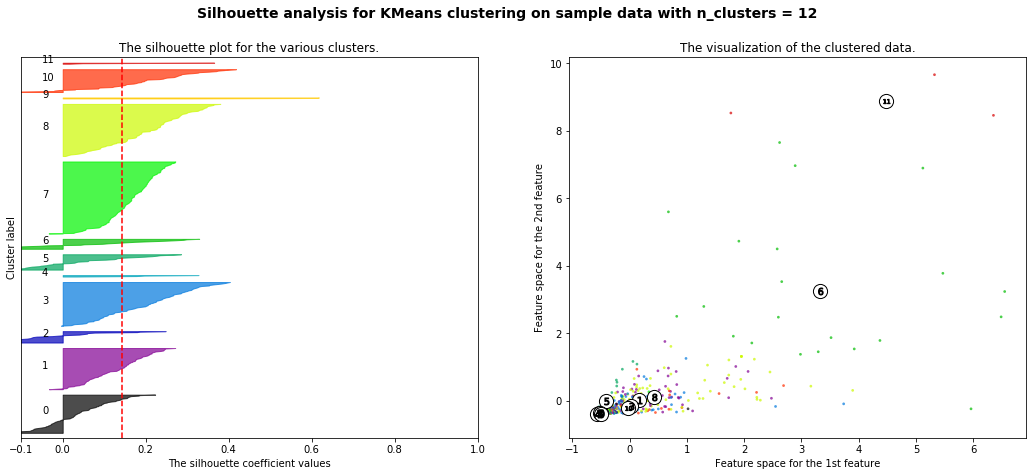

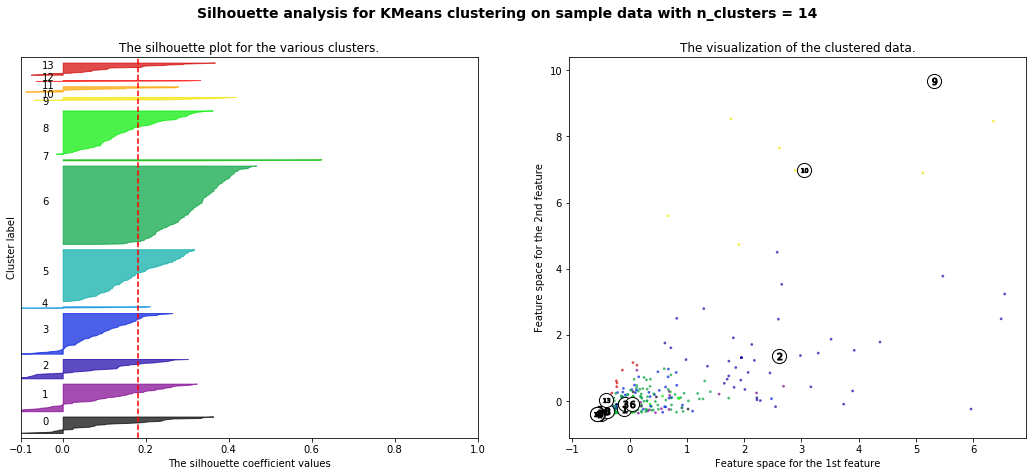

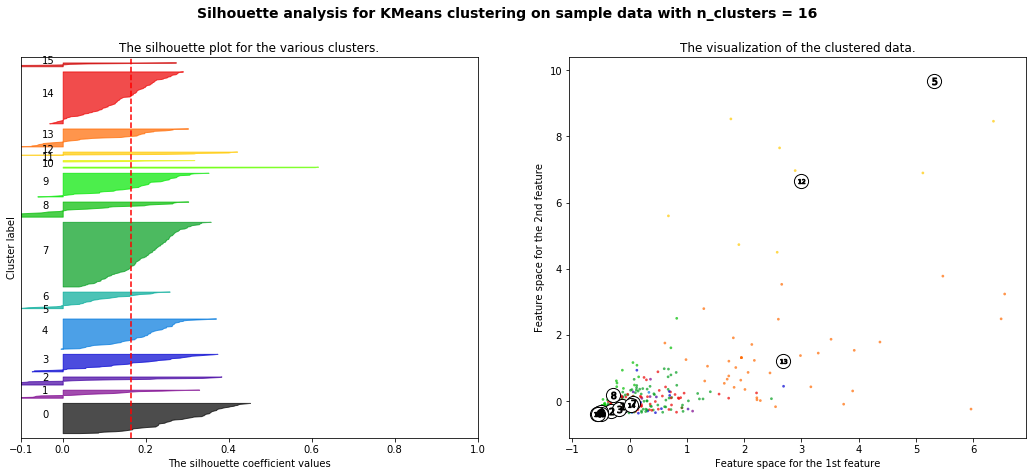

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14, 16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(groupby_domains_clustering_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(groupby_domains_clustering_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(groupby_domains_clustering_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(groupby_domains_clustering_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(groupby_domains_clustering_scaled[:, 0], groupby_domains_clustering_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [31]:
# add clustering labels
groupby_domains_clustering.insert(0, 'Cluster Labels', kmeans.labels_)

In [33]:
final_clusters = groupby_domains.join(groupby_domains_clustering['Cluster Labels'], how ='left')

In [34]:
final_clusters['Cluster Labels'].value_counts()


5.0     122
4.0      99
0.0      95
7.0      79
2.0      57
6.0      52
3.0      41
9.0      29
12.0     27
13.0     19
11.0      7
8.0       5
10.0      3
1.0       2
Name: Cluster Labels, dtype: int64

# FIRST CONCLUSSIONS:

Although this is quick aproximation and I still have work to do with the data,  KMEANS algorithm doesn´t seem to be a good choice to make clusters. 

We can see in the graph and in the silhouette score than the distances between clusters are really small, so we can´t clear up the separation of the domains

Because of this, I´m gonna try other clustering methods